1. 

In [10]:
# Hien thi anh mau
def show_result_color(original, result, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

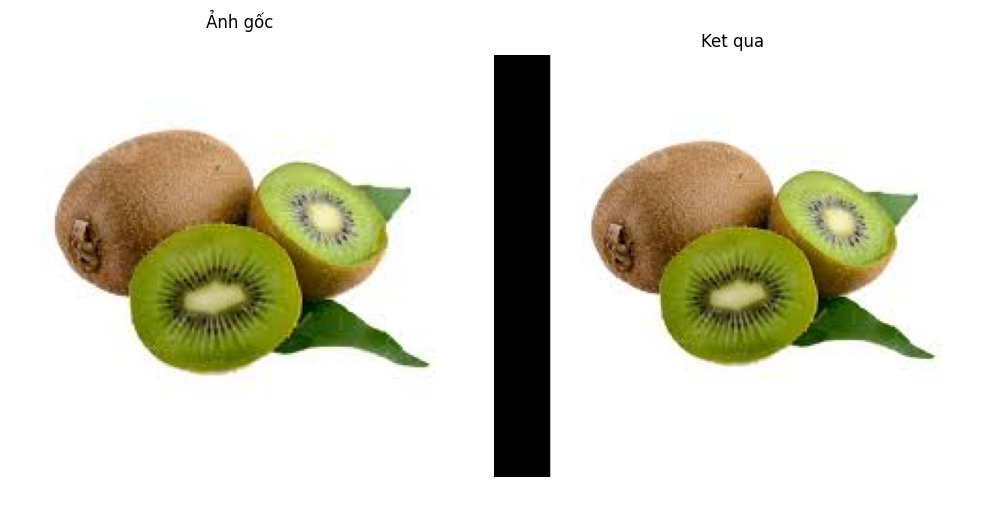

In [1]:
import cv2
import numpy as np
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt

def show_result_color(original, result, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

img = cv2.imread('kiwi.jpg')
M = np.float32([[1, 0, 30], [0, 1, 0]])
translated = cv2.warpAffine(img, M, (img.shape[1] + 30, img.shape[0]))
cv2.imwrite('kiwi_translated.jpg', translated)
show_result_color(img, translated, 'Ket qua')


2. 

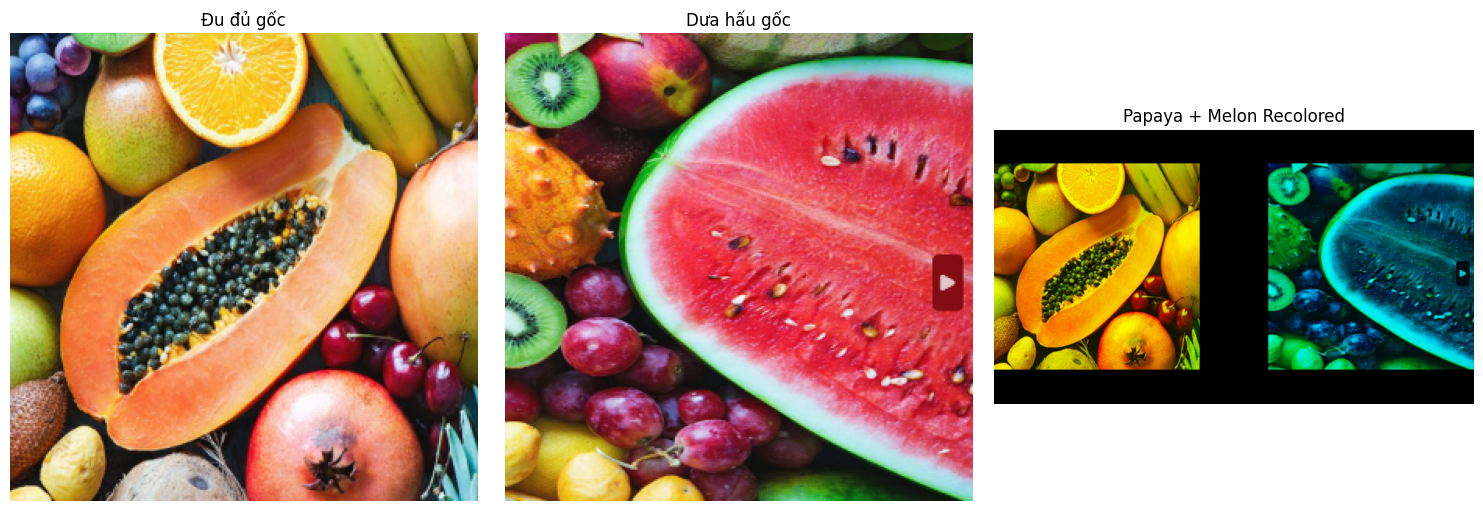

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_result_color(original1, original2, result, title):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original1, cv2.COLOR_BGR2RGB))
    plt.title("Đu đủ gốc")
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(original2, cv2.COLOR_BGR2RGB))
    plt.title("Dưa hấu gốc")
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

papaya = cv2.imread('dudu.png')
melon = cv2.imread('duahau.png')
papaya_raw = cv2.resize(papaya.copy(), (300, 300))
melon_raw = cv2.resize(melon.copy(), (300, 300))
papaya = cv2.resize(papaya, (300, 300))
melon = cv2.resize(melon, (300, 300))
papaya[:, :, 0] = 0
melon[:, :, 2] = 0
canvas = np.zeros((400, 700, 3), dtype=np.uint8)
canvas[50:350, 0:300] = papaya
canvas[50:350, 400:700] = melon
cv2.imwrite('fruit_recolor.jpg', canvas)
show_result_color(papaya_raw, melon_raw, canvas, 'Papaya + Melon doi mau')


3.Viết chương trình chọn ngọn núi và con thuyền từ ảnh quang_ninh.jpg trong thư mục exercise. Xoay 2 đối tượng này 1 góc 45 độ và lưu vào máy.

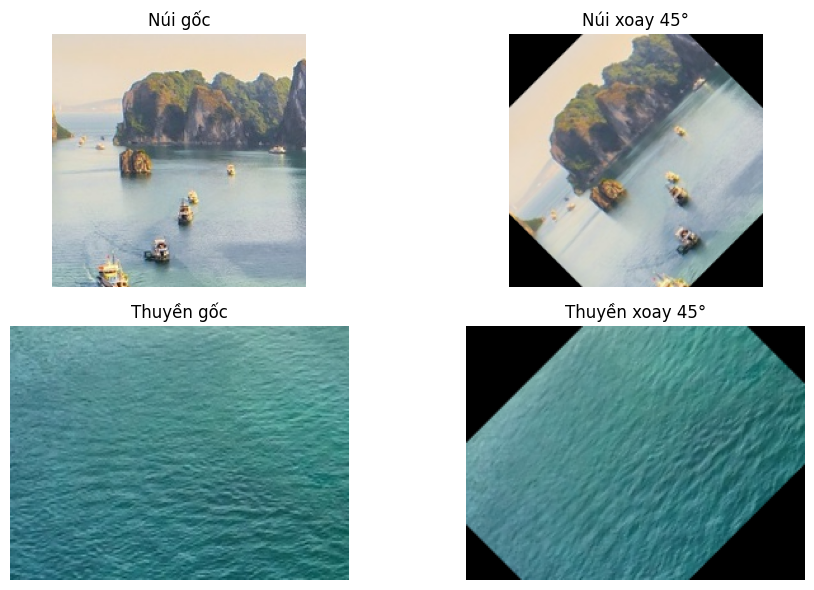

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('exercise/quang_ninh.jpg')
mountain = img[100:300, 200:400]
boat = img[350:500, 100:300]

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

mountain_rotated = rotate_image(mountain, 45)
boat_rotated = rotate_image(boat, 45)

def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].imshow(bgr2rgb(mountain))
axs[0, 0].set_title("Núi gốc")
axs[0, 0].axis("off")

axs[0, 1].imshow(bgr2rgb(mountain_rotated))
axs[0, 1].set_title("Núi xoay 45°")
axs[0, 1].axis("off")

axs[1, 0].imshow(bgr2rgb(boat))
axs[1, 0].set_title("Thuyền gốc")
axs[1, 0].axis("off")

axs[1, 1].imshow(bgr2rgb(boat_rotated))
axs[1, 1].set_title("Thuyền xoay 45°")
axs[1, 1].axis("off")

plt.tight_layout()
plt.show()


4 . Tăng kích thước chùa và hiển thị pagoda

Kích thước chùa gốc: (348, 600, 3)
Kích thước chùa phóng to: (1740, 3000, 3)


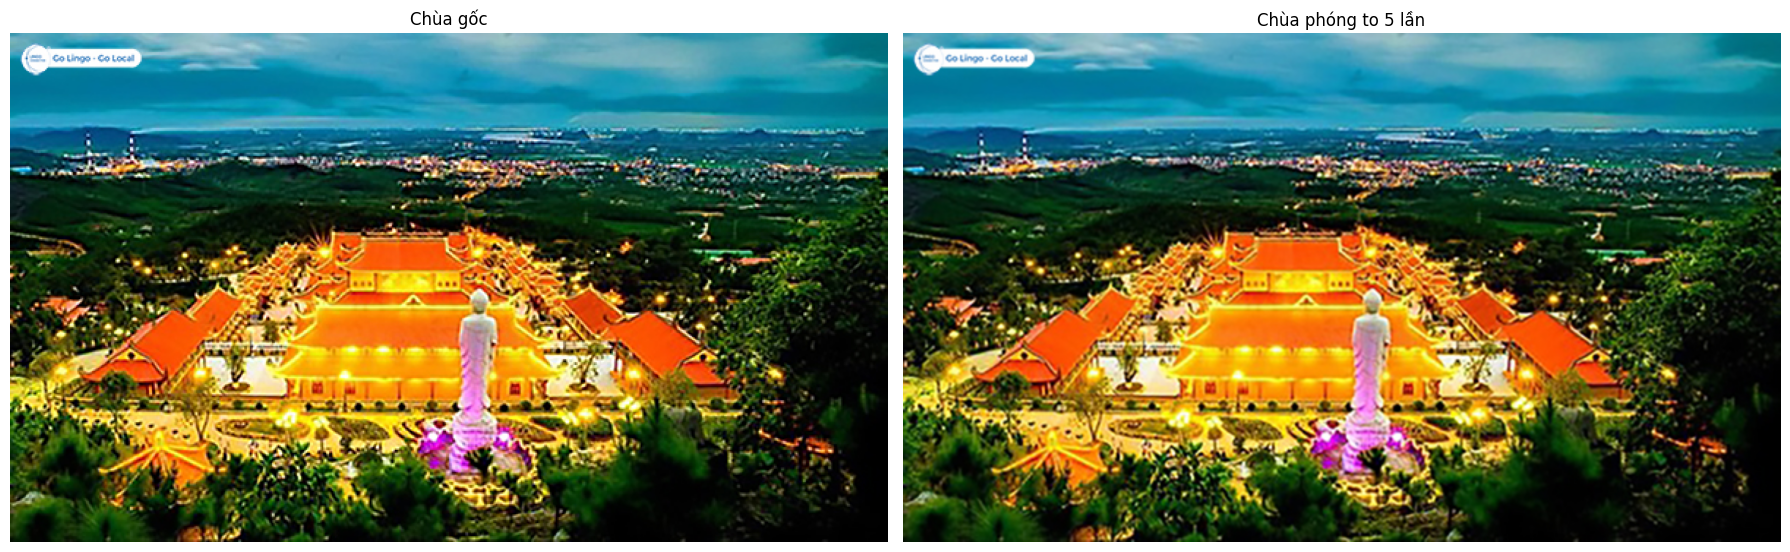

In [3]:
import cv2
import matplotlib.pyplot as plt
pagoda = cv2.imread('exercise/pagoda.jpg')
pagoda_enlarged = cv2.resize(pagoda, (0, 0), fx=5, fy=5)
def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Kích thước chùa gốc:", pagoda.shape)
print("Kích thước chùa phóng to:", pagoda_enlarged.shape)
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
axs[0].imshow(bgr2rgb(pagoda))
axs[0].set_title("Chùa gốc")
axs[0].axis("off")
axs[1].imshow(bgr2rgb(pagoda_enlarged))
axs[1].set_title("Chùa phóng to 5 lần")
axs[1].axis("off")
plt.tight_layout()
plt.show()


5 Menu biến đổi & hiển thị tương tác 

Chọn ảnh (1: mountain, 2: boat, 3: pagoda): 
Chọn phép biến đổi: T (Tịnh tiến), X (Xoay), P (Phóng to), H (Thu nhỏ), C (Coordinate Map)


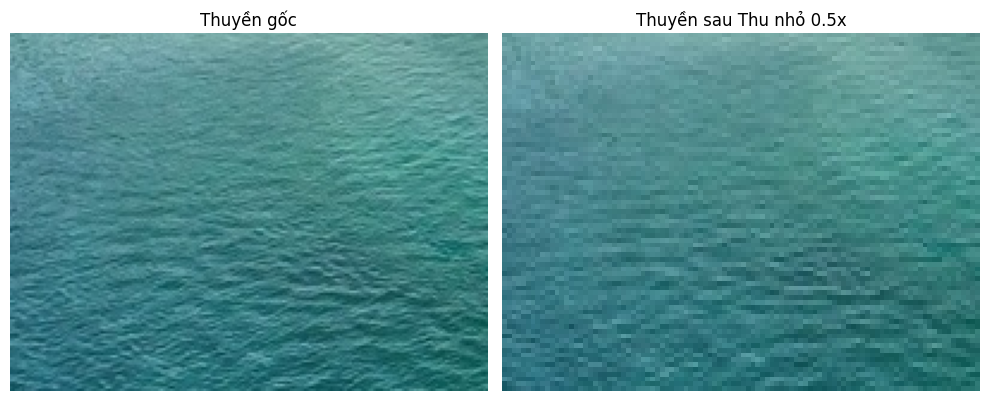

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def rotate_image(img, angle):
    (h, w) = img.shape[:2]
    M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1)
    return cv2.warpAffine(img, M, (w, h))

def translate_image(img, tx, ty):
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def resize_image(img, scale):
    return cv2.resize(img, (0, 0), fx=scale, fy=scale)

def coordinate_map(img):
    img_copy = img.copy()
    h, w = img.shape[:2]
    for y in range(0, h, 50):
        cv2.line(img_copy, (0, y), (w, y), (0, 255, 0), 1)
    for x in range(0, w, 50):
        cv2.line(img_copy, (x, 0), (x, h), (0, 255, 0), 1)
    return img_copy

print("Chọn ảnh (1: mountain, 2: boat, 3: pagoda): ")
choice = input(">> ")

if choice == "1":
    img = cv2.imread('exercise/quang_ninh.jpg')[100:300, 200:400]
    name = "Núi"
elif choice == "2":
    img = cv2.imread('exercise/quang_ninh.jpg')[350:500, 100:300]
    name = "Thuyền"
else:
    img = cv2.imread('exercise/pagoda.jpg')
    name = "Chùa"

print("Chọn phép biến đổi: T (Tịnh tiến), X (Xoay), P (Phóng to), H (Thu nhỏ), C (Coordinate Map)")
action = input(">> ").upper()

if action == "T":
    result = translate_image(img, 100, 50)
    title = "Tịnh tiến"
elif action == "X":
    result = rotate_image(img, 45)
    title = "Xoay 45°"
elif action == "P":
    result = resize_image(img, 2.0)
    title = "Phóng to 2x"
elif action == "H":
    result = resize_image(img, 0.5)
    title = "Thu nhỏ 0.5x"
elif action == "C":
    result = coordinate_map(img)
    title = "Map tọa độ"
else:
    print("Sai lựa chọn.")
    exit()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(bgr2rgb(img))
axs[0].set_title(f"{name} gốc")
axs[0].axis("off")

axs[1].imshow(bgr2rgb(result))
axs[1].set_title(f"{name} sau {title}")
axs[1].axis("off")

plt.tight_layout()
plt.show()
